# Global power plant DB from
https://datasets.wri.org/dataset/globalpowerplantdatabase

orginial link from here
https://github.com/awesomedata/awesome-public-datasets#energy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# matplotlib Themes   - 'Solarize_Light2' & 'ggplot' are both nice.
plt.style.use('seaborn')
# sns.set_style("seaborn")
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"

In [3]:
df = pd.read_csv('global_power_plant_database.csv')
gdp = pd.read_csv('GDP_world_bank_by_country.csv', skiprows=4)
gdp.head()

C:\Users\goldsby_c\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.507808,146.910907,156.078705,182.115000,162.232750,180.087426,...,1734.938417,1712.686908,1701.765354,1546.877709,1429.596045,1571.307053,1573.221585,1527.734558,1356.699267,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,...,1965.118485,2157.481149,2178.368454,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


### Merge the GDP data for 2020 with the other dataset.

In [4]:
df = pd.merge(left=df, right=gdp[['Country Code', '2020']], left_on='country', right_on='Country Code')
# rename new column
df = df.rename(columns={'2020':'GDP_per_capita_2020'})
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,Country Code,GDP_per_capita_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,AFG,516.747871
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,AFG,516.747871
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,AFG,516.747871
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,AFG,516.747871
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,AFG,516.747871


In [5]:
### Make G20 and G7 dataframes
g20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 
    'Japan', 'South Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States of America']

g7 = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States of America']

g7_ex_US = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']

g20 = df[df['country_long'].isin(g20)]
g7 = df[df['country_long'].isin(g7)]
g7_ex_US = df[df['country_long'].isin(g7_ex_US)]

print(len(g20['country_long'].unique()))
print(len(g7['country_long'].unique()))
print(len(g7_ex_US['country_long'].unique()))

g20

19
7
6


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,Country Code,GDP_per_capita_2020
90,ARG,Argentina,AGUA DEL CAJON (AUTOGENERADOR DEL MEM),ARG0000231,479.2,-38.9368,-68.3556,Other,Gas,NaN,...,NaN,NaN,0.00,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,ARG,8579.017773
91,ARG,Argentina,AGUA DEL CAJON (GENERADOR DEL MEM),ARG0000232,192.0,-38.9368,-68.3556,Gas,NaN,NaN,...,NaN,NaN,1075.39,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,ARG,8579.017773
92,ARG,Argentina,AGUA DEL TORO,ARG0000210,130.0,-34.5792,-68.9892,Hydro,NaN,NaN,...,413.29,415.17,289.92,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,ARG,8579.017773
93,ARG,Argentina,ALICURA,ARG0000230,1050.0,-40.5800,-70.7489,Hydro,NaN,NaN,...,3575.78,3416.89,2896.84,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,ARG,8579.017773
94,ARG,Argentina,ALMIRANTE BROWN,ARG0000156,25.0,-34.8386,-58.4033,Oil,NaN,NaN,...,NaN,NaN,113.26,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,ARG,8579.017773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34489,USA,United States of America,Zion Landfill Gas to Energy Facility,USA0056871,7.0,42.4803,-87.8861,Waste,NaN,NaN,...,NaN,NaN,1.26,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,USA,63413.513858
34490,USA,United States of America,Zorn,USA0001368,18.0,38.2803,-85.7023,Gas,NaN,NaN,...,NaN,NaN,63.47,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,USA,63413.513858
34491,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,6.57,6.52,6.81,WIND-V1,WIND-V1,WIND-V1,WIND-V1,WIND-V1,USA,63413.513858
34492,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,NaN,NaN,1.62,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,USA,63413.513858


In [6]:
# shape
df.shape

(34886, 38)

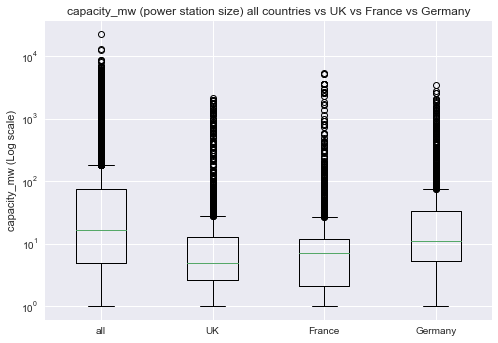

In [9]:
# look at capacity - compare UK with all countries

plt.boxplot([df['capacity_mw'], 
            df[df['country_long'] == 'United Kingdom']['capacity_mw'],
            df[df['country_long'] == 'France']['capacity_mw'], 
            df[df['country_long'] == 'Germany']['capacity_mw']], 
            labels=['all','UK', 'France', 'Germany'])
plt.yscale('log')
plt.ylabel('capacity_mw (Log scale)')
plt.title('capacity_mw (power station size) all countries vs UK vs France vs Germany');


## 10 largest station in the world

<AxesSubplot:title={'center':'Largest power stations in the world'}, ylabel='name'>

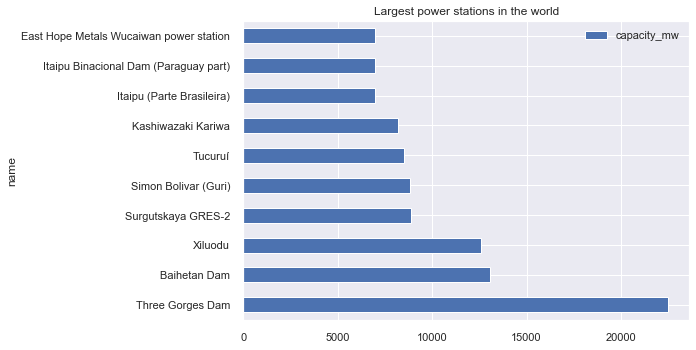

In [65]:
df.sort_values(by='capacity_mw').nlargest(10, 'capacity_mw').plot.barh(x='name', y='capacity_mw', title='Largest power stations in the world')

In [10]:
# remove the 3 largest stations from the df
df2 = df[df['capacity_mw'] < 10000].copy()
df2.shape

(34883, 38)

In [11]:
# check nulls Sort by high NULL counts.
df.isnull().sum().sort_values(ascending=False)

other_fuel3                       34794
other_fuel2                       34610
other_fuel1                       32942
generation_gwh_2013               28469
generation_gwh_2014               27660
generation_gwh_2015               26683
generation_gwh_2016               25742
generation_gwh_2017               25386
generation_gwh_2018               25249
generation_gwh_2019               25227
generation_data_source            23486
year_of_capacity_data             20002
estimated_generation_gwh_2013     18785
wepp_id                           18685
estimated_generation_gwh_2014     18402
estimated_generation_gwh_2015     17855
commissioning_year                17461
estimated_generation_gwh_2016     17335
owner                             14028
estimated_generation_gwh_2017      1780
geolocation_source                  419
GDP_per_capita_2020                 108
url                                  18
source                               15
country_long                          0


In [12]:
# make new column with capacity bins
df2['cap_bins'] = pd.cut(df2['capacity_mw'], bins=20)

In [13]:
# Make Groupby object 'country'
country_gb_PF = df2.groupby(['country_long', 'primary_fuel'])
country_gb_CAP = df2.groupby(['country_long', 'cap_bins'])
gb_CAP = df2.groupby(pd.cut(df2['capacity_mw'], bins=10))
country_gb = df2.groupby('country_long')
fuel_gb = df2.groupby('primary_fuel')

In [14]:
country_PF = country_gb_PF['country'].count().sort_values()
# country_PF.unstack().plot(kind='bar', figsize=(30,8), stacked=True)

# country_PF.plot(kind='bar', figsize=(20,8), stacked=True)

In [15]:
df[['country_long','primary_fuel']].value_counts().head(20)

country_long              primary_fuel
United States of America  Solar           3283
                          Gas             1818
                          Hydro           1449
China                     Solar           1318
United Kingdom            Solar           1170
United States of America  Wind            1139
China                     Hydro            947
                          Coal             946
United States of America  Oil              876
India                     Solar            851
China                     Wind             835
France                    Solar            817
United Kingdom            Wind             780
Germany                   Solar            735
France                    Wind             721
Brazil                    Hydro            701
                          Oil              627
Canada                    Hydro            556
United States of America  Waste            541
Brazil                    Biomass          444
dtype: int64

In [16]:
df.query("country_long == 'United Kingdom'").columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017',
       'Country Code', 'GDP_per_capita_2020'],
      dtype='object')

## Focus on the UK

primary_fuel - count

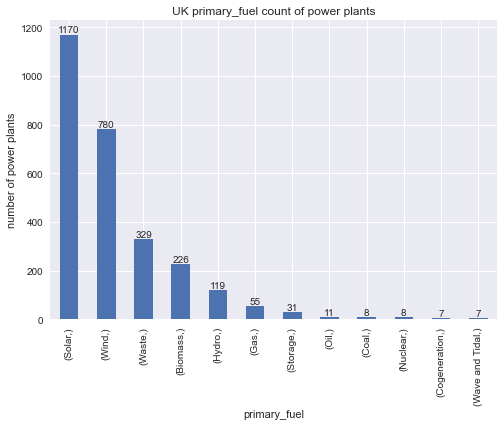

In [17]:
# count of UK primary_fuel

ax = df.query("country_long == 'United Kingdom'").filter(['primary_fuel']).value_counts().plot.bar(title='UK primary_fuel count of power plants', ylabel='number of power plants');

for container in ax.containers:
    ax.bar_label(container)

primary_fuel - capacity

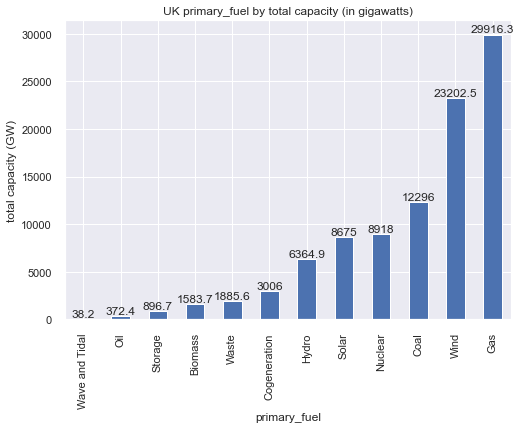

In [43]:
df.query("country_long == 'United Kingdom'").groupby(['primary_fuel']).sum()['capacity_mw'].sort_values().plot.bar(title='UK primary_fuel by total capacity (in gigawatts)', ylabel='total capacity (GW)');


### Largest UK power stations

<AxesSubplot:xlabel='name'>

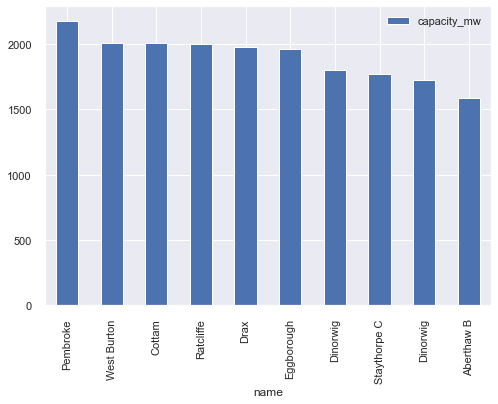

In [84]:
df.query("country_long == 'United Kingdom'").nlargest(10, 'capacity_mw')[['name', 'primary_fuel', 'capacity_mw']].set_index('name').plot.bar() # .plot.bar(x='name', y='capacity_mw')


In [19]:
country_gb.get_group('United Kingdom')['cap_bins'].value_counts()

(-7.864, 444.2]     2700
(444.2, 887.4]        22
(887.4, 1330.6]       15
(1330.6, 1773.8]       7
(1773.8, 2217.0]       7
(5319.4, 5762.6]       0
(7978.6, 8421.8]       0
(7535.4, 7978.6]       0
(7092.2, 7535.4]       0
(6649.0, 7092.2]       0
(6205.8, 6649.0]       0
(5762.6, 6205.8]       0
(4433.0, 4876.2]       0
(4876.2, 5319.4]       0
(3989.8, 4433.0]       0
(3546.6, 3989.8]       0
(3103.4, 3546.6]       0
(2660.2, 3103.4]       0
(2217.0, 2660.2]       0
(8421.8, 8865.0]       0
Name: cap_bins, dtype: int64

In [20]:
country_gb_CAP['country'].count().sort_values()

country_long              cap_bins        
Latvia                    (8421.8, 8865.0]       0
Namibia                   (3103.4, 3546.6]       0
                          (3546.6, 3989.8]       0
                          (3989.8, 4433.0]       0
                          (4433.0, 4876.2]       0
                                              ... 
France                    (-7.864, 444.2]     2119
Brazil                    (-7.864, 444.2]     2302
United Kingdom            (-7.864, 444.2]     2700
China                     (-7.864, 444.2]     3371
United States of America  (-7.864, 444.2]     9052
Name: country, Length: 3240, dtype: int64

In [24]:
# capacity of UK stations.
country_gb_CAP_test = country_gb_CAP['primary_fuel'].count()
pd.cut(country_gb_CAP_test, bins=5)['Afghanistan']

cap_bins
(-7.864, 444.2]     (-9.052, 1810.4]
(444.2, 887.4]      (-9.052, 1810.4]
(887.4, 1330.6]     (-9.052, 1810.4]
(1330.6, 1773.8]    (-9.052, 1810.4]
(1773.8, 2217.0]    (-9.052, 1810.4]
(2217.0, 2660.2]    (-9.052, 1810.4]
(2660.2, 3103.4]    (-9.052, 1810.4]
(3103.4, 3546.6]    (-9.052, 1810.4]
(3546.6, 3989.8]    (-9.052, 1810.4]
(3989.8, 4433.0]    (-9.052, 1810.4]
(4433.0, 4876.2]    (-9.052, 1810.4]
(4876.2, 5319.4]    (-9.052, 1810.4]
(5319.4, 5762.6]    (-9.052, 1810.4]
(5762.6, 6205.8]    (-9.052, 1810.4]
(6205.8, 6649.0]    (-9.052, 1810.4]
(6649.0, 7092.2]    (-9.052, 1810.4]
(7092.2, 7535.4]    (-9.052, 1810.4]
(7535.4, 7978.6]    (-9.052, 1810.4]
(7978.6, 8421.8]    (-9.052, 1810.4]
(8421.8, 8865.0]    (-9.052, 1810.4]
Name: primary_fuel, dtype: category
Categories (5, interval[float64, right]): [(-9.052, 1810.4] < (1810.4, 3620.8] < (3620.8, 5431.2] < (5431.2, 7241.6] < (7241.6, 9052.0]]

In [25]:
# make small df with 1000 rows only
df_small = df.loc[:1000,:]


In [26]:
df_small.shape

(1001, 38)

## Worlds largest power stations by fuel type

Gas

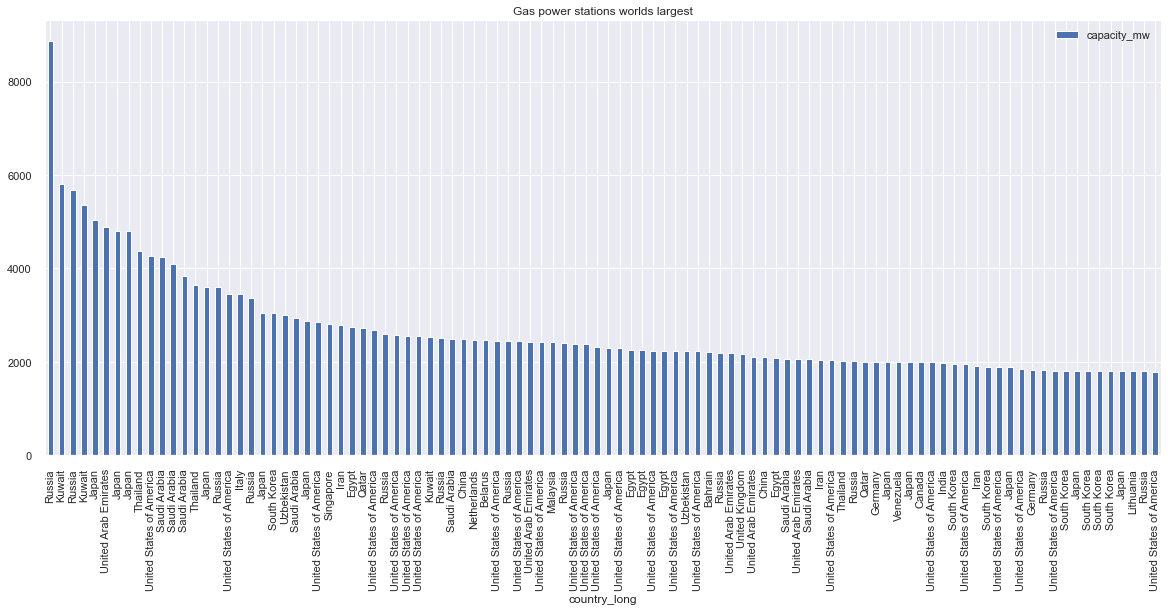

In [91]:
(df.groupby('primary_fuel')
    .get_group('Gas')
    .sort_values(by='capacity_mw', ascending=False)
    .head(100)[['capacity_mw', 'country_long']]
    .plot.bar(x='country_long', title='Gas power stations worlds largest', figsize=(20,8), stacked=True));


Nuclear

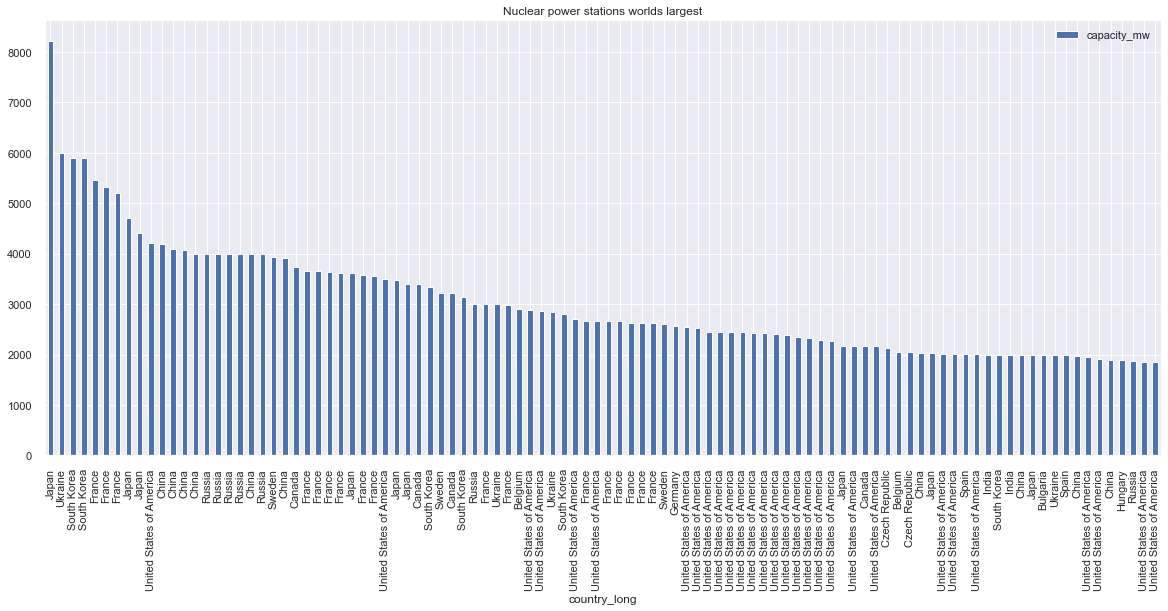

In [92]:
(df.groupby('primary_fuel')
    .get_group('Nuclear')
    .sort_values(by='capacity_mw', ascending=False)
    .head(100)[['capacity_mw', 'country_long']]
    .plot.bar(x='country_long', title='Nuclear power stations worlds largest', figsize=(20,8), stacked=True));

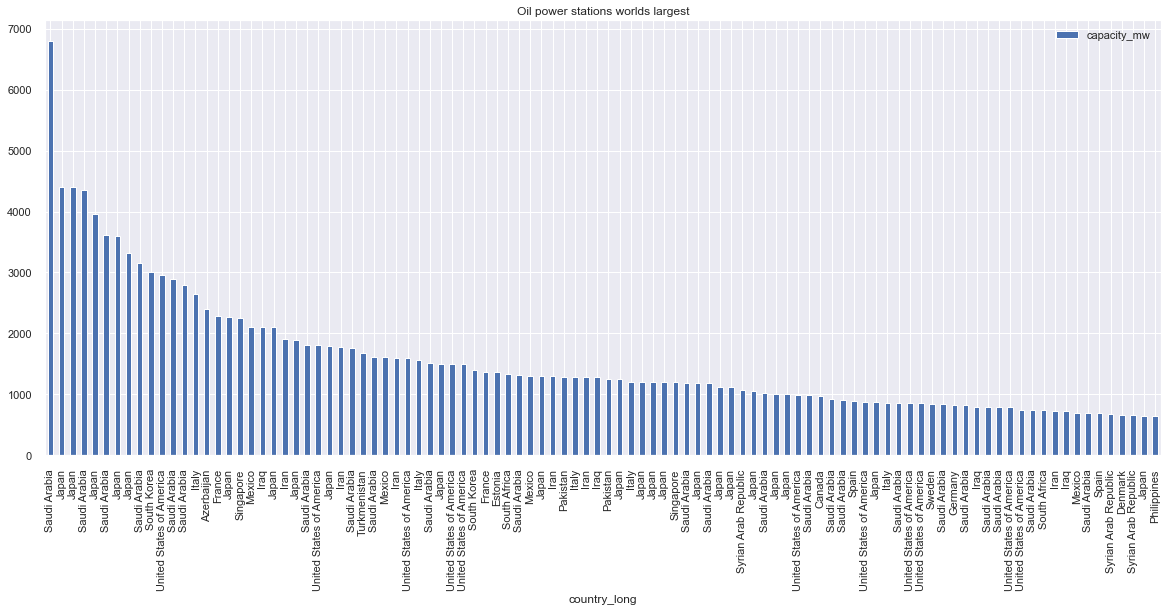

In [93]:
(df.groupby('primary_fuel')
    .get_group('Oil')
    .sort_values(by='capacity_mw', ascending=False)
    .head(100)[['capacity_mw', 'country_long']]
    .plot.bar(x='country_long', title='Oil power stations worlds largest', figsize=(20,8), stacked=True));

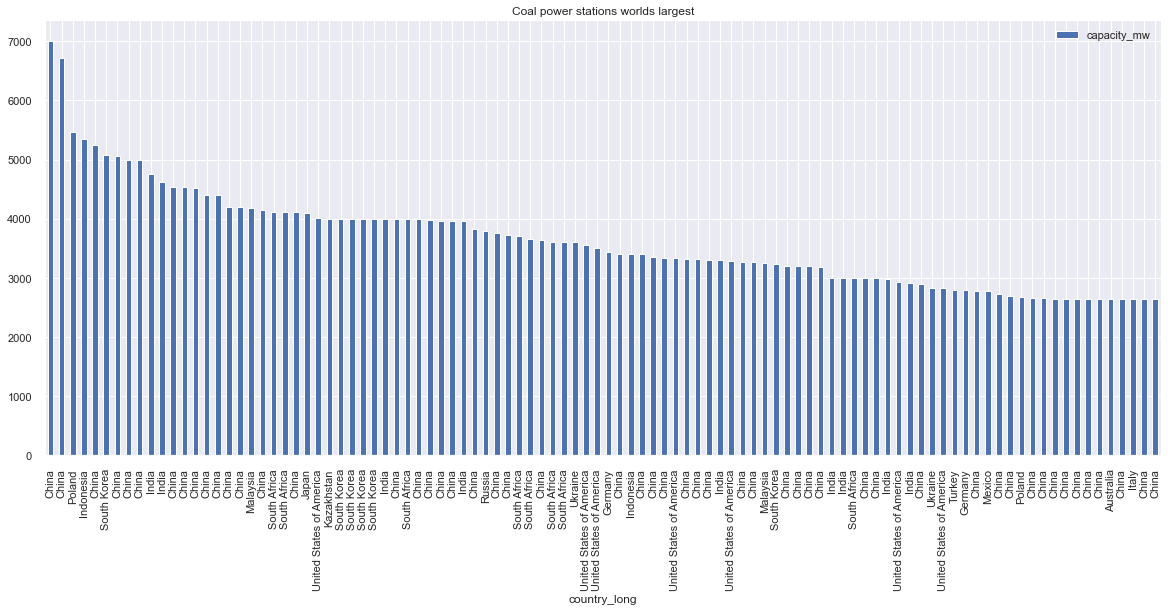

In [94]:
# fuel_gb.get_group('Coal').sort_values(by='capacity_mw', ascending=False).head(100)[['capacity_mw', 'country_long']].plot(kind='bar', x='country_long', title='Coal power stations worlds largest', figsize=(20,8));

(df.groupby('primary_fuel')
    .get_group('Coal')
    .sort_values(by='capacity_mw', ascending=False)
    .head(100)[['capacity_mw', 'country_long']]
    .plot.bar(x='country_long', title='Coal power stations worlds largest', figsize=(20,8), stacked=True));

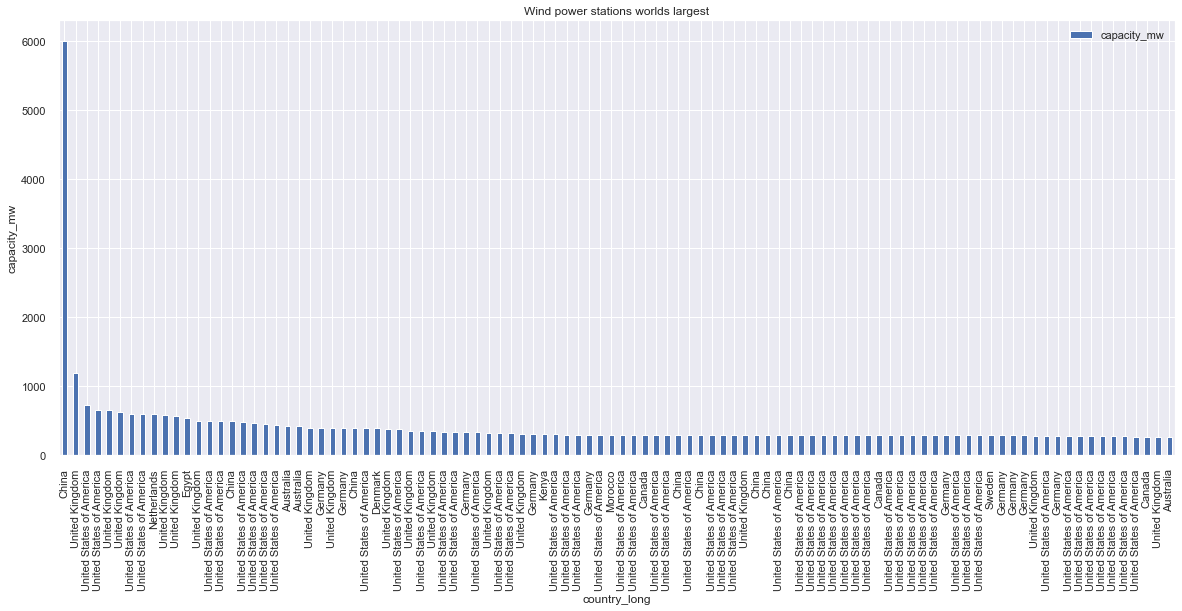

In [33]:
data = fuel_gb.get_group('Wind').sort_values(by='capacity_mw', ascending=False).head(100)[['capacity_mw', 'country_long']]
data.plot(kind='bar', x='country_long', title='Wind power stations worlds largest', figsize=(20,8)).set_ylabel('capacity_mw');

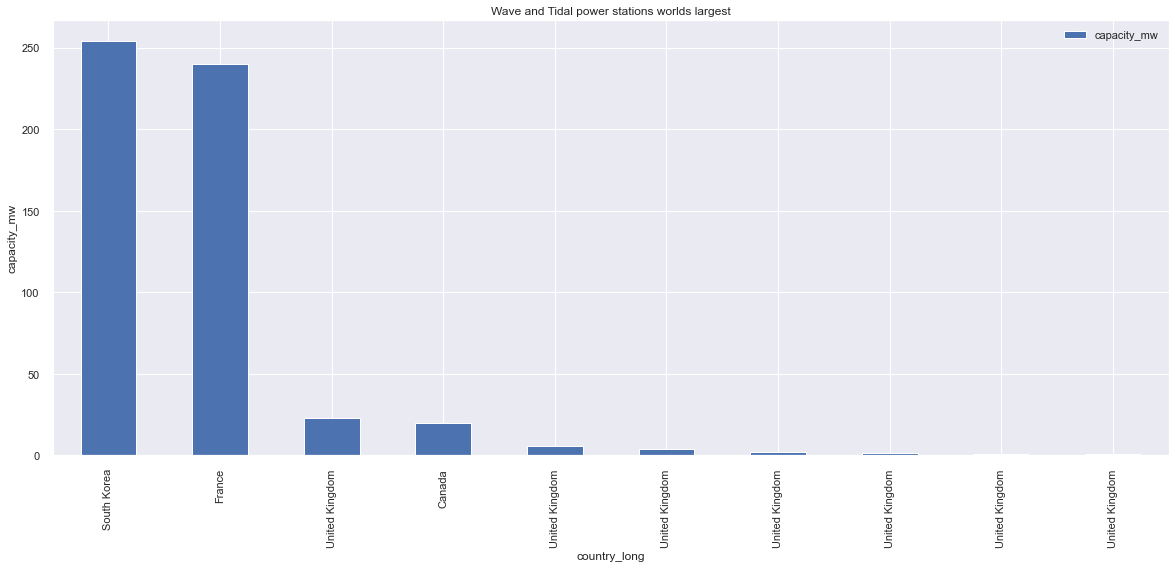

In [34]:
chart1 = fuel_gb.get_group('Wave and Tidal').sort_values(by='capacity_mw', ascending=False).head(70)[['capacity_mw', 'country_long']]

chart1.plot(kind='bar',
            x='country_long', 
            title='Wave and Tidal power stations worlds largest', 
            figsize=(20,8)).set_ylabel('capacity_mw');

Having problems using FacetGrid on a Groupby object. Only working on a dataframe.

In [35]:
df['country_long'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa Rica', 'Cote DIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy

In [36]:
# Select countries
countries = ['United States of America', 'United Kingdom', 'China']

three_countries = df[df['country_long'].isin(countries)]
three_countries.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,Country Code,GDP_per_capita_2020
5072,CHN,China,APP Zhenjiang Jindong Mill power station,WRI1075566,290.0,32.1944,119.6998,Coal,NaN,NaN,...,NaN,NaN,1413.08,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,CHN,10434.775187
5073,CHN,China,Aba Minjiang River Jiangseba,WRI1072501,128.0,31.4837,103.6032,Hydro,NaN,NaN,...,507.82,557.96,470.01,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,CHN,10434.775187
5074,CHN,China,Abag Banner Huiteng Liang Phase 1,WRI1072152,49.0,43.3500,115.9000,Wind,NaN,NaN,...,NaN,NaN,90.92,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,CHN,10434.775187


In [37]:
# make a new df with just top ten GDP per capita
top_gdp = df[df['GDP_per_capita_2020'] > 1000].sort_values('GDP_per_capita_2020', ascending=False).head(100)
top_gdp.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,Country Code,GDP_per_capita_2020
17151,LUX,Luxembourg,Esch-sur-Alzette CCGT Power Plant Luxembourg,GEODB0045217,385.0,49.5119,5.9646,Gas,NaN,NaN,...,NaN,NaN,908.11,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,LUX,116014.602497
17152,LUX,Luxembourg,Vianden Pumped Storage Power Plant Luxembourg,GEODB0045216,1296.0,49.9518,6.1784,Hydro,NaN,NaN,...,3599.13,3342.20,4056.41,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,LUX,116014.602497
21260,CHE,Switzerland,Isenthal (Bolzbach),WRI1004254,12.0,46.8820,8.6161,Hydro,NaN,NaN,...,39.86,38.97,46.53,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,CHE,87097.036450


There is a problem with Seaborn titles overlaping on the FacetGrid. Below blog has a solution.

https://wckdouglas.github.io/2016/12/seaborn_annoying_title

## Focus on Nuclear in G7

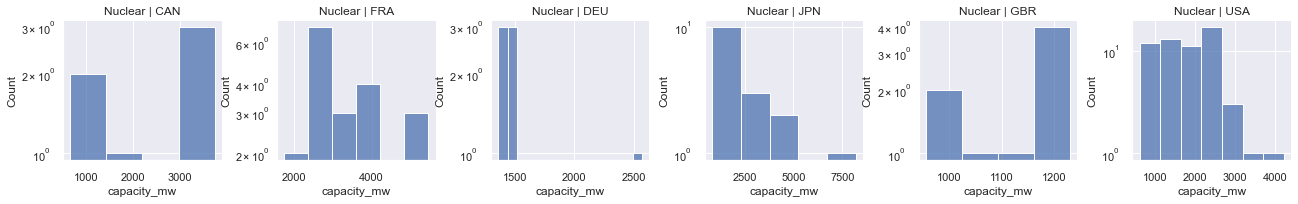

In [38]:
# gridspec_kws={'wspace':2, 'hspace':0.1}     this line spaces the small plots. works but does not fix the title overlap problem.
# sharex=False, sharey=False                   these allow x and y to have their own scale. WORKS well
# .set(yscale = 'log')                          give log scale on y axis.

# three_countries

fuel = g7[g7['primary_fuel'] == 'Nuclear']

g = sns.FacetGrid(fuel, row='primary_fuel', col='country', sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="capacity_mw").set(yscale = 'log')
# Below fixes the overlapting titles.
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');

# Compare primary fuel by country

In [39]:
px.histogram(g7_ex_US, 
            x='country_long', 
            y='capacity_mw', 
            color='primary_fuel', 
            title='G7 power production capacity by primary_fuel')  # log_y=True,

In [95]:
px.histogram(g20, 
            x='country_long', 
            y='capacity_mw', 
            color='primary_fuel', 
            title='G20 power production capacity by primary_fuel')  # log_y=True,

# Coal use by country

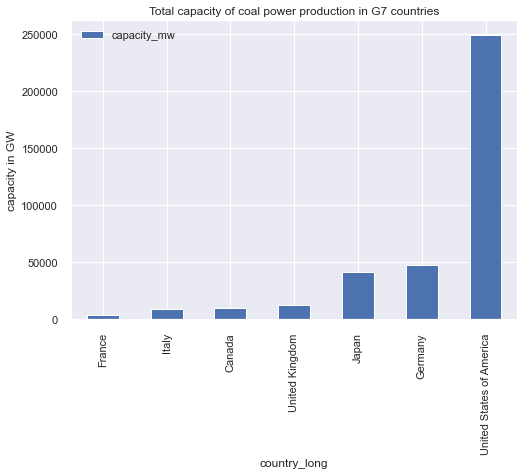

In [116]:
(g7.query("primary_fuel == 'Coal'")
    .groupby(['country_long']).agg({'capacity_mw': 'sum'})
    .reset_index()
    .sort_values(by=('capacity_mw'))
    .plot.bar(x='country_long', title='Total capacity of coal power production in G7 countries', ylabel='capacity in GW'));

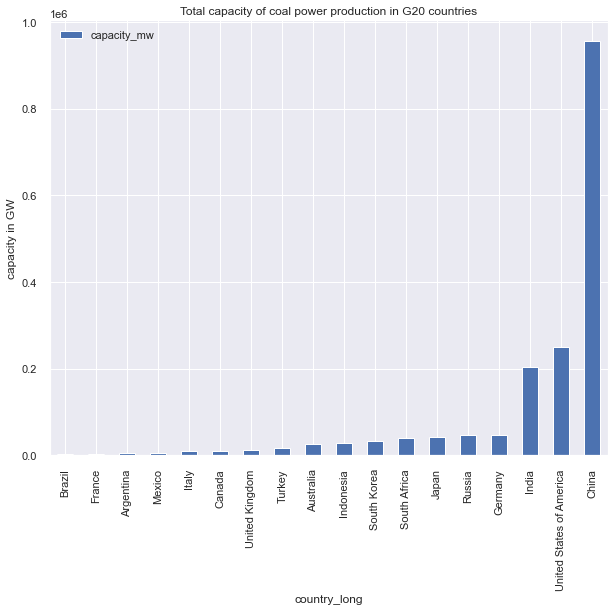

In [118]:
(g20.query("primary_fuel == 'Coal'")
    .groupby(['country_long']).agg({'capacity_mw': 'sum'})
    .reset_index()
    .sort_values(by=('capacity_mw'))
    .plot.bar(x='country_long', title='Total capacity of coal power production in G20 countries', ylabel='capacity in GW', figsize=(10,8)));